In [1]:
from transformers import OneFormerConfig, OneFormerModel

# Initializing a OneFormer shi-labs/oneformer_ade20k_swin_tiny configuration
configuration = OneFormerConfig()

print(configuration)

print("\n\n\n")
# Initializing a model (with random weights) from the shi-labs/oneformer_ade20k_swin_tiny style configuration
model = OneFormerModel(configuration)

print(model)
print("\n\n\n")


# Accessing the model configuration
configuration = model.config

print(configuration)

ImportError: cannot import name 'OneFormerConfig' from 'transformers' (/home/tanzila/anaconda3/lib/python3.10/site-packages/transformers/__init__.py)

In [2]:
from transformers import OneFormerForUniversalSegmentation

model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny")

ImportError: 
OneFormerForUniversalSegmentation requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [7]:
from transformers import OneFormerConfig, OneFormerForUniversalSegmentation, Swinv2Config

configuration = OneFormerConfig(backbone_config=Swinv2Config.from_pretrained("microsoft/swinv2-base-patch4-window12-192-22k"))

ImportError: 
OneFormerForUniversalSegmentation requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [6]:
configuration

OneFormerConfig {
  "_commit_hash": null,
  "backbone_config": {
    "_name_or_path": "",
    "add_cross_attention": false,
    "architectures": [
      "Swinv2ForImageClassification"
    ],
    "attention_probs_dropout_prob": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": null,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "depths": [
      2,
      2,
      18,
      2
    ],
    "diversity_penalty": 0.0,
    "do_sample": false,
    "drop_path_rate": 0.1,
    "early_stopping": false,
    "embed_dim": 128,
    "encoder_no_repeat_ngram_size": 0,
    "encoder_stride": 32,
    "eos_token_id": null,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token_id": null,
    "hidden_act": "gelu",
    "hidden_dropout_prob": 0.0,
    "hidden_size": 1024,
    "id2label": {
      "0": "LABEL_0",
      "1": "LABEL_1",
 

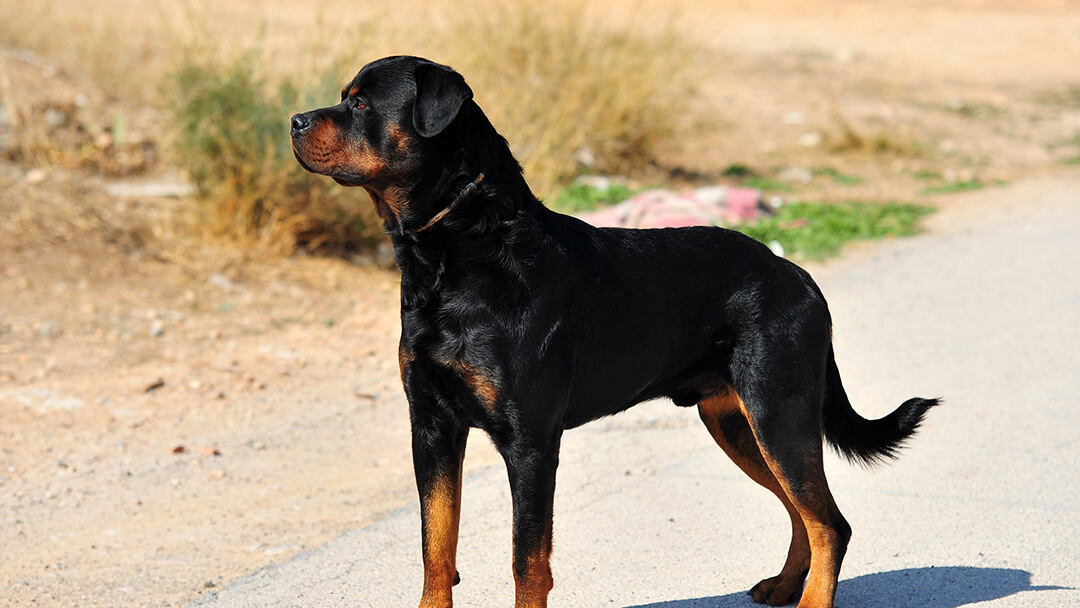

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Swinv2ImageClassifierOutput(loss=None, logits=tensor([[-3.0500e-01,  1.4777e-01,  1.0052e-01,  1.1576e-01, -1.3287e-01,
          2.2145e-01, -6.9165e-02,  1.4878e-01, -5.9881e-01, -3.6777e-03,
         -2.7265e-01, -1.4777e-01,  1.1073e-01,  3.8935e-02, -1.8119e-01,
         -1.3217e-01, -4.2212e-01, -8.4964e-01, -3.3658e-01,  1.8663e-01,
         -5.5652e-01,  3.8079e-01,  6.0204e-02,  9.2066e-01,  2.8539e-01,
         -6.8563e-02, -1.5671e-02, -1.7844e-01, -2.0642e-01, -1.8831e-01,
          3.6142e-02, -1.7098e-01, -3.9281e-02, -3.5369e-01, -4.6759e-01,
         -7.5455e-02, -2.4177e-01,  1.2364e-01, -5.6882e-01, -6.1764e-01,
         -5.6295e-01,  2.2261e-01, -6.4554e-02,  9.2383e-02,  7.4985e-03,
          3.0455e-01, -2.3863e-01, -1.2155e-01,  8.2640e-01, -3.0184e-01,
         -2.6265e-01,  4.2871e-02,  1.5489e-01, -4.4295e-01,  3.1825e-01,
          5.9397e-02, -3.4653e-01, -1.1270e-01, -2.7815e-01,  1.5891e-01,
          1.3845e-01, -2.3014e-01,  5.6742e-01,  8.5844e-02, -4.47

In [13]:
from transformers import AutoImageProcessor, Swinv2ForImageClassification
import torch
from datasets import load_dataset
from IPython.display import display



# dataset = load_dataset("huggingface/cats-image")
# image = dataset["test"]["image"][0]


image_url = "https://www.purina.co.uk/sites/default/files/2020-12/Dog_1098119012_Teaser.jpg"

image = Image.open(requests.get(image_url, stream=True).raw)

display(image)

image_processor = AutoImageProcessor.from_pretrained("microsoft/swinv2-tiny-patch4-window8-256")
model = Swinv2ForImageClassification.from_pretrained("microsoft/swinv2-tiny-patch4-window8-256")

inputs = image_processor(image, return_tensors="pt")

# print(inputs)

with torch.no_grad():
    outputs = model(**inputs)
    print(outputs)
    logits = outputs.logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

## Detr Panoptic Segmentation

In [10]:
import io
import requests
from PIL import Image
import torch
import numpy

from transformers import AutoImageProcessor, DetrForSegmentation
from transformers.image_transforms import rgb_to_id

url = "https://img.freepik.com/premium-photo/labrador-retriever-dog-panting-ginger-cat-sitting-front-dark-yellow-background_191971-28714.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50-panoptic")
model = DetrForSegmentation.from_pretrained("facebook/detr-resnet-50-panoptic")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# Use the `post_process_panoptic_segmentation` method of the `image_processor` to retrieve post-processed panoptic segmentation maps
# Segmentation results are returned as a list of dictionaries
result = image_processor.post_process_panoptic_segmentation(outputs, target_sizes=[(300, 500)])

# A tensor of shape (height, width) where each value denotes a segment id, filled with -1 if no segment is found
panoptic_seg = result[0]["segmentation"]
# Get prediction score and segment_id to class_id mapping of each segment
panoptic_segments_info = result[0]["segments_info"]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [11]:
result[0]["segmentation"].shape

torch.Size([300, 500])